# ガンマ分布

In [6]:
from shiori.utils.viewer import set_plot_params, sns, plt
from shiori.utils.path import ProjectPath
from pathlib import Path
import numpy as np
from matplotlib import animation
from math import gamma
from scipy.stats import chi2
from scipy.stats import gamma as gamma_dist
set_plot_params()
name = Path().cwd().name + "/gamma"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir
save_dir.mkdir(parents=True, exist_ok=True)
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})


In [8]:
x = np.linspace(0, 30, 1000)

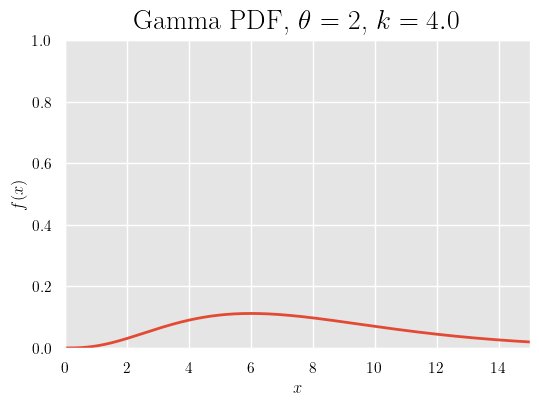

In [26]:
def gamma_pdf(x, k, theta):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    m = x > 0
    c = 1.0 / (theta**k * gamma(k))
    out[m] = c * x[m]**(k - 1) * np.exp(-x[m]/theta)
    return out

# params
# fix theta
theta = 2
ks = np.linspace(1,4,20)
x = np.linspace(0, 30, 1000)

fig, ax = plt.subplots(figsize=(6, 4))
(line,) = ax.plot([], [], lw=2)
title = ax.text(0.5, 1.02, "", ha="center", va="bottom", transform=ax.transAxes)
ax.set_xlim(0, 15)
ax.set_ylim(0, 1)
ax.set_xlabel("$x$"); ax.set_ylabel("$f(x)$"); ax.grid(True)

def init():
    line.set_data([], [])
    title.set_text("")
    return line, title

def update(i):
    k = list(ks)[i]
    y = gamma_pdf(x, k, theta)
    line.set_data(x, y)
    title.set_text(rf"Gamma PDF, $\theta$ = 2, $k = {round(k, 3)}$")
    title.set_fontsize(20)
    return line, title

ani = animation.FuncAnimation(fig, update, frames=len(list(ks)),
                              init_func=init, blit=True, interval=1000/12)

from matplotlib.animation import PillowWriter
ani.save(save_dir / "pdf1.gif", writer=PillowWriter(fps=2))


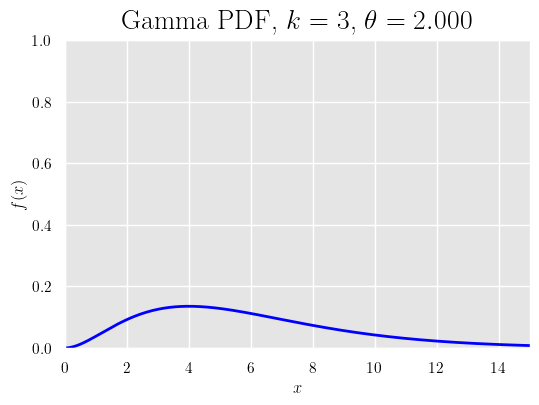

In [27]:
def gamma_pdf(x, k, theta):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    m = x > 0
    c = 1.0 / (theta**k * gamma(k))
    out[m] = c * x[m]**(k - 1) * np.exp(-x[m]/theta)
    return out

# params
# fix theta
k = 3
thetas = np.linspace(0.1,2,20)
x = np.linspace(0, 30, 1000)

fig, ax = plt.subplots(figsize=(6, 4))
(line,) = ax.plot([], [], lw=2, color="blue")
title = ax.text(0.5, 1.02, "", ha="center", va="bottom", transform=ax.transAxes)
ax.set_xlim(0, 15)
ax.set_ylim(0, 1)
ax.set_xlabel("$x$"); ax.set_ylabel("$f(x)$"); ax.grid(True)

def init():
    line.set_data([], [])
    title.set_text("")
    return line, title

def update(i):
    theta = list(thetas)[i]
    y = gamma_pdf(x, k, theta)
    line.set_data(x, y)
    title.set_text(rf"Gamma PDF, $k=3$, $\theta={theta:.3f}$")
    title.set_fontsize(20)
    return line, title

ani = animation.FuncAnimation(fig, update, frames=len(list(thetas)),
                              init_func=init, blit=True, interval=1000/12)

from matplotlib.animation import PillowWriter
ani.save(save_dir / "pdf2.gif", writer=PillowWriter(fps=2))
